# Multiple Linear Regression, Part 2: 

## Model Validation

Today we'll focus on how to validate our models.

### Set Up Our Data Again

In [1]:
# Basic imports

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns

Credit data from https://www.kaggle.com/avikpaul4u/credit-card-balance

Target: `Balance`

In [3]:
# Data
df = pd.read_csv('data/Credit.csv', 
                 usecols=['Income', 'Limit', 'Rating', 'Age', 'Balance'])

In [4]:
df.head()

,Income,Limit,Rating,Age,Balance
0,14.891,3606,283,34,333
1,106.025,6645,483,82,903
2,104.593,7075,514,71,580
3,148.924,9504,681,36,964
4,55.882,4897,357,68,331


In [5]:
df.describe()

,Income,Limit,Rating,Age,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,55.667500,520.015000
std,35.244273,2308.198848,154.724143,17.249807,459.758877
min,10.354000,855.000000,93.000000,23.000000,0.000000
25%,21.007250,3088.000000,247.250000,41.750000,68.750000
50%,33.115500,4622.500000,344.000000,56.000000,459.500000
75%,57.470750,5872.750000,437.250000,70.000000,863.000000
max,186.634000,13913.000000,982.000000,98.000000,1999.000000


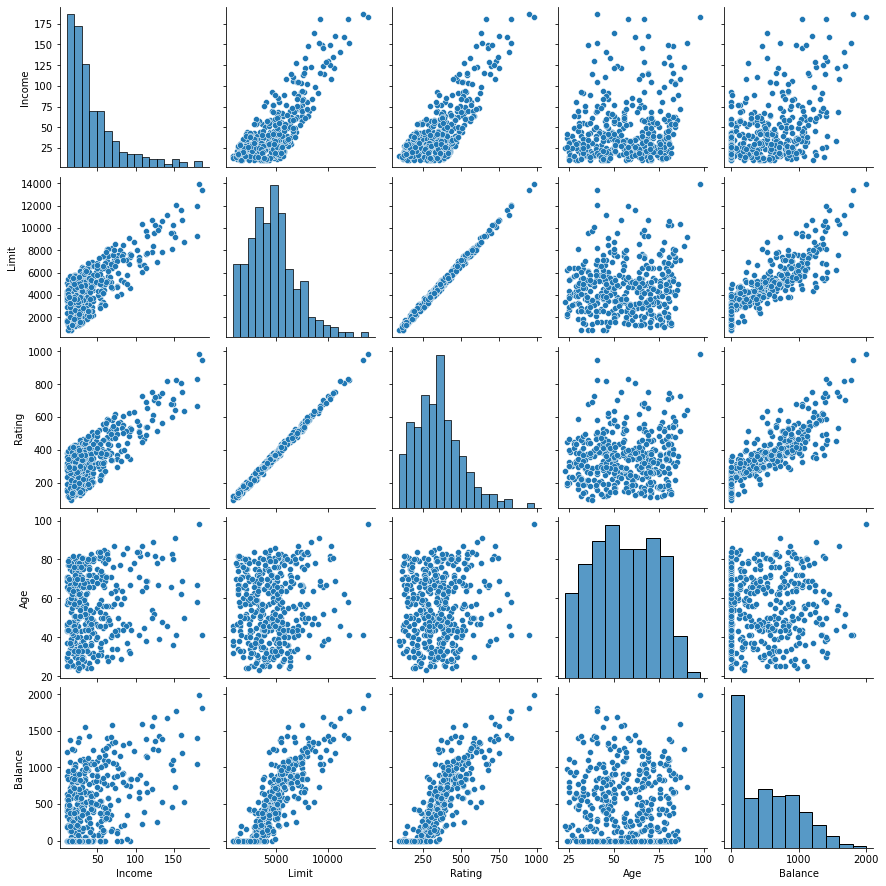

In [6]:
sns.pairplot(df)

## Modeling Practice

Last time, we left off after identifying some issues in our initial multiple linear regression model. Let's build that model back - now, with sklearn! - and then discuss one change we can implement and see if it improves our model.

In [18]:
# Imports
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [9]:
# Define X and y

used_cols = [c for c in df.columns if c not in ['Balance']]

X = df[used_cols]
y = df['Balance']

In [19]:
# Let's be sure to scale our X variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Fit our model!
model = LinearRegression()

model.fit(X_scaled, y)

LinearRegression()

In [21]:
# Grab our predictions and evaluate
y_preds = model.predict(X_scaled)

residuals = y-y_preds

print(f"R2 Score: {r2_score(y, y_preds):.4f}")
print(f"MAE: {mean_absolute_error(y, y_preds):.4f}")
print(f"RMSE: {mean_squared_error(y, y_preds, squared=False):.4f}")

R2 Score: 0.8772
MAE: 120.3084
RMSE: 160.8886


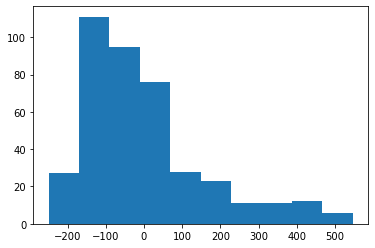

In [22]:
plt.hist(residuals);

#### Now, make a change!

- Students may suggest dropping columns, log transforming something, etc.

## Model Validation - AKA How to Build Generalizable Models

![validation gif from giphy](https://media.giphy.com/media/242wLqQerWkxd6GgHB/giphy.gif)

Our premise: Let's say you have a dataframe, with some number of rows of data, and that's all you have available to you. The hope is that you can train a model on this data that can then be used to make predictions about new data that comes in. You want your model to _generalize_ well and work on this incoming data - not too complex from learning all the details/noise from the data, but also not so simple that the model is useless. How do we do that?

First, let's go into detail about this trade-off between simplicity and complexity:

### The Bias-Variance Trade Off

<img alt="original image from https://rmartinshort.jimdofree.com/2019/02/17/overfitting-bias-variance-and-leaning-curves/" src="images/underfit-goodfit-overfit.png" width=750, height=350>  

Remember - by modeling, we're assuming that there is some relationship between our X variables (the features in our dataset) and our y variable (the target). Thus, there is some underlying '_true_' function that captures the relationship between X and y, which we are trying to find by modeling. Of course, the actual relationship may be quite complex and not wholly represented in our data - our approximation, aka the model we create, is likely only a simplified estimator of whatever our '_true_' function actually would look like.

**Bias**: Error introduced by approximating a real-life problem (which may be extremely complicated) by a much simpler model (because the model is too simple to capture the underlying pattern)

**Variance**: Amount by which our model would change if we estimated it using a different training dataset (because the model is over-learning from the training data)

**Representation:**

<img alt="from https://hsto.org/files/281/108/1e9/2811081e9eda44d08f350be5a9deb564.png" src="images/bias-variance.png/" width=350, height=350>

## How To Minimize Bias and Variance

Good news! There are tried and true methods to reducing both bias and variance in our modeling process. Testing different models, trying models on different slices of data, transforming or engineering features - all of these things have a role to play in creating better, more robust models.

In particular, we've learned so far that we can evaluate the performance of our models, using a scoring metric, which will help us catch if a model is underfit - if it's performing quite poorly, it probably isn't capturing the relationship in our data! 

But what about overfitting?

<img alt="I Love Lucy shrug gif from Giphy" src="https://media.giphy.com/media/JRhS6WoswF8FxE0g2R/giphy.gif" width=350, height=350>

### Train-Test Split

The idea: don't train your model on ALL of your data, but keep some of it in reserve to test on, in order to simulate how it will work on new/incoming data.

#### Example:

<img alt="original image from https://www.dataquest.io/wp-content/uploads/kaggle_train_test_split.svg plus some added commentary" src="images/traintestsplit_80-20.png" width=850, height=150>  

Note - here, it looks like we're just taking the tail end of the dataset and setting it aside. In practice (most of the time), the split will randomly choose which rows are in the train vs. test sets.

How does this fight against overfitting? By witholding data from the training process, we are testing whether the model actually _generalizes_ well. If it does poorly on the test set, it's a good sign that our model learned too much noise from the train set and is overfit! 

![arrested development gif, found by Andy](https://heavy.com/wp-content/uploads/2013/05/tumblr_mjm9fqhrle1rvnnvyo6_250.gif)

#### Practice:

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
print(X.shape)
X.head()

(400, 4)


,Income,Limit,Rating,Age
0,14.891,3606,283,34
1,106.025,6645,483,82
2,104.593,7075,514,71
3,148.924,9504,681,36
4,55.882,4897,357,68


In [25]:
print(y.shape)
y.head()

(400,)


0    333
1    903
2    580
3    964
4    331
Name: Balance, dtype: int64

In [26]:
# Train test split here!
# Set test_size = .33
# Set random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

What did that do?

In [27]:
X_train.shape

(268, 4)

In [28]:
X_test.shape

(132, 4)

In [29]:
len(X_train + X_test) == len(X)

True

In [30]:
X_train.head()

,Income,Limit,Rating,Age
258,41.400,2561,215,36
177,22.379,3965,292,34
119,23.012,1410,137,81
194,30.406,2120,181,79
229,69.943,7555,547,76


Now let's put our train/test split into practice:

In [31]:
# Instantiate a new scaler to scale our data
# Let's use Standard Scaler here

scaler = StandardScaler()

In [32]:
# Fit our scaler - ON THE TRAINING DATA!!
# Then transform both train and test 

X_train_scaled = scaler.fit_transform(X_train)
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [33]:
# Instantiate an sklearn linear model
lr = LinearRegression()

In [34]:
# Fit your model - ON THE TRAINING DATA!!

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
# Grab predictions for train and test set

y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

In [36]:
# How'd we do?
from sklearn.metrics import r2_score

print(f"Train R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Test R2 Score: {r2_score(y_test, y_pred_test)}")

Train R2 Score: 0.8839095625541942
Test R2 Score: 0.857120129266434


Evaluate!

- 


In [37]:
# Single variable example

X_single = df['Income']
y = df['Balance']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X_single, y, test_size=0.33, random_state=42)

In [39]:
scaler = StandardScaler()
X_s_train = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_s_test = scaler.transform(X_test.values.reshape(-1, 1))

lr = LinearRegression()
lr.fit(X_s_train, y_train)
lr.score(X_s_test, y_test)

0.09186644925972043

### But Wait... There's More!

Let's change something and see what happens:

In [40]:
for n in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.33, 
                                                        random_state=n) # <--
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    
    y_pred_train = lr.predict(X_train_scaled)
    y_pred_test = lr.predict(X_test_scaled)
    
    print(f"Random Seed: {n}")
    print(f"Train R2 Score: {r2_score(y_train, y_pred_train)}")
    print(f"Test R2 Score: {r2_score(y_test, y_pred_test)}")
    print("-----")

Random Seed: 0
Train R2 Score: 0.8816250691689365
Test R2 Score: 0.86534430143169
-----
Random Seed: 1
Train R2 Score: 0.8739121177939032
Test R2 Score: 0.8817820618701313
-----
Random Seed: 2
Train R2 Score: 0.8721919719038161
Test R2 Score: 0.8846079850261082
-----
Random Seed: 3
Train R2 Score: 0.8974043975902336
Test R2 Score: 0.8362975650284136
-----
Random Seed: 4
Train R2 Score: 0.874675868023156
Test R2 Score: 0.8772222118791736
-----
Random Seed: 5
Train R2 Score: 0.8909805750077764
Test R2 Score: 0.8456587495826275
-----
Random Seed: 6
Train R2 Score: 0.862622107418222
Test R2 Score: 0.9010427805249317
-----
Random Seed: 7
Train R2 Score: 0.8861186364025077
Test R2 Score: 0.8566221710241827
-----
Random Seed: 8
Train R2 Score: 0.873954251571108
Test R2 Score: 0.880062341012604
-----
Random Seed: 9
Train R2 Score: 0.8757992793580943
Test R2 Score: 0.8791365550566275
-----


What's happening here? All we're doing is changing our `random_seed` - why is that having such an impact on our model's scores? Some models appear overfit, some don't - and for some, the test score is **better** than our train score!

### K-Fold Cross-Validation

Sometimes, random chance means your training data isn't representative, or includes wacky data like all of our outliers. So, why do just one train-test split when you can do `k` number of them!

![cross validation image from kaggle: https://www.kaggle.com/alexisbcook/cross-validation](images/cross-validation.png)

The good news is, we'll never actually have to do this by hand - `sklearn` will handle it for us!

Documentation: https://scikit-learn.org/stable/modules/cross_validation.html

In [44]:
# Scale our data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
# Note - in practice, better to scale within the cross validate...
# But we're saving how to do that with pipelines til later

In [45]:
# Instantiate a fresh linear regression model
lr = LinearRegression()

In [46]:
# Let's use cross_val_score
# Set cv = 5
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_scaled, y, cv=5, scoring="r2")

In [47]:
# Look at the test scores across our folds
scores

array([0.85984521, 0.85397379, 0.88630863, 0.87218637, 0.88726436])

In [48]:
# Print it nicely
print(f"Scores: {scores.mean():.3f} +/- {scores.std():.3f}")

Scores: 0.872 +/- 0.013


Why show the standard deviation of scores here? I want some measure of the variance among my scores, so I can tell how different my scores were based on different breakdowns of the training data.

If I made a change to my model and the average of my cross-validated scores stayed about the same, but the variance among those scores decreased, that's a better, more generalizable model than before!

### Additional Resources:

- [Great bias/variance infographic](https://elitedatascience.com/bias-variance-tradeoff) from Elite Data Science
- Taking a more statistical approach? [Probabilistic Model Selection with AIC, BIC, and MDL](https://machinelearningmastery.com/probabilistic-model-selection-measures/) 